In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_iris

feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data,columns=feature_names)
y_data = load_iris().target

X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.feature_selection import f_classif, VarianceThreshold, mutual_info_classif, SelectKBest

f_value = f_classif(X_data, y_data)

for feature in zip(feature_names, f_value[0]):
    print(feature)

('sepal length (cm)', 119.26450218449871)
('sepal width (cm)', 49.16004008961098)
('petal length (cm)', 1180.1611822529776)
('petal width (cm)', 960.0071468018025)


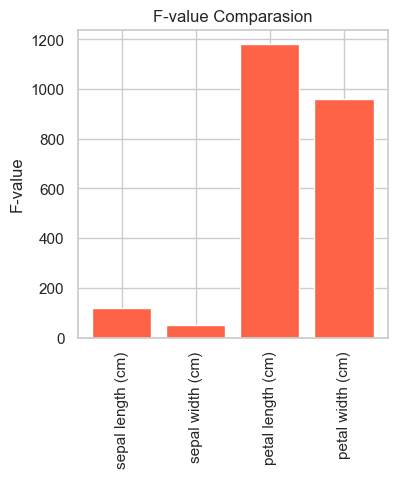

In [5]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title("F-value Comparasion")
plt.show()

In [6]:
selector=VarianceThreshold()
selector.fit_transform(X_data)

for feature in zip(feature_names, selector.variances_):
    print(feature)

('sepal length (cm)', 0.6811222222222222)
('sepal width (cm)', 0.1887128888888887)
('petal length (cm)', 3.0955026666666674)
('petal width (cm)', 0.5771328888888888)


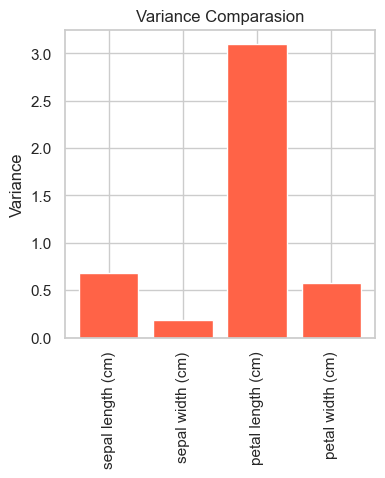

In [7]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title("Variance Comparasion")
plt.show()

In [8]:
selector = VarianceThreshold(threshold=0.2)
X_data_new = selector.fit_transform(X_data)

print(f"Number od features before variance thresholding: {X_data.shape[1]}")
print(f"Number od features after variance thresholding: {X_data_new.shape[1]}")

Number od features before variance thresholding: 4
Number od features after variance thresholding: 3


In [9]:
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

for feature in zip(feature_names, MI_score):
    print(feature)

('sepal length (cm)', 0.4738732342805525)
('sepal width (cm)', 0.28607227699171767)
('petal length (cm)', 0.9895851732491787)
('petal width (cm)', 0.9749379656705233)


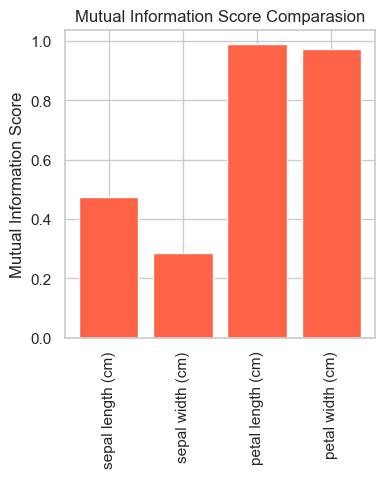

In [10]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title("Mutual Information Score Comparasion")
plt.show()

In [11]:
skb = SelectKBest(score_func=f_classif,k=2)
X_data_new = skb.fit_transform(X_data, y_data)
print(f"Number od features before selection: {X_data.shape[1]}")
print(f"Number od features after selection: {X_data_new.shape[1]}")

Number od features before selection: 4
Number od features after selection: 2


In [12]:
for feature_list_index in skb.get_support(indices=True):
    print('- '+ feature_names[feature_list_index])

- petal length (cm)
- petal width (cm)


In [13]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

efs = EFS(estimator = lr,
         min_features=1,
         max_features=4,
         scoring='accuracy',
         cv=5)
efs=efs.fit(X_data, y_data)
print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):',efs.best_idx_)
print('Best subset (corresponding names):',efs.best_feature_names_)

Features: 15/15

Best accuracy score: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [15]:
X_data_new = efs.transform(X_data)
print(f"Number od features before selection: {X_data.shape[1]}")
print(f"Number od features after selection: {X_data_new.shape[1]}")

Number od features before selection: 4
Number od features after selection: 4


In [16]:
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02


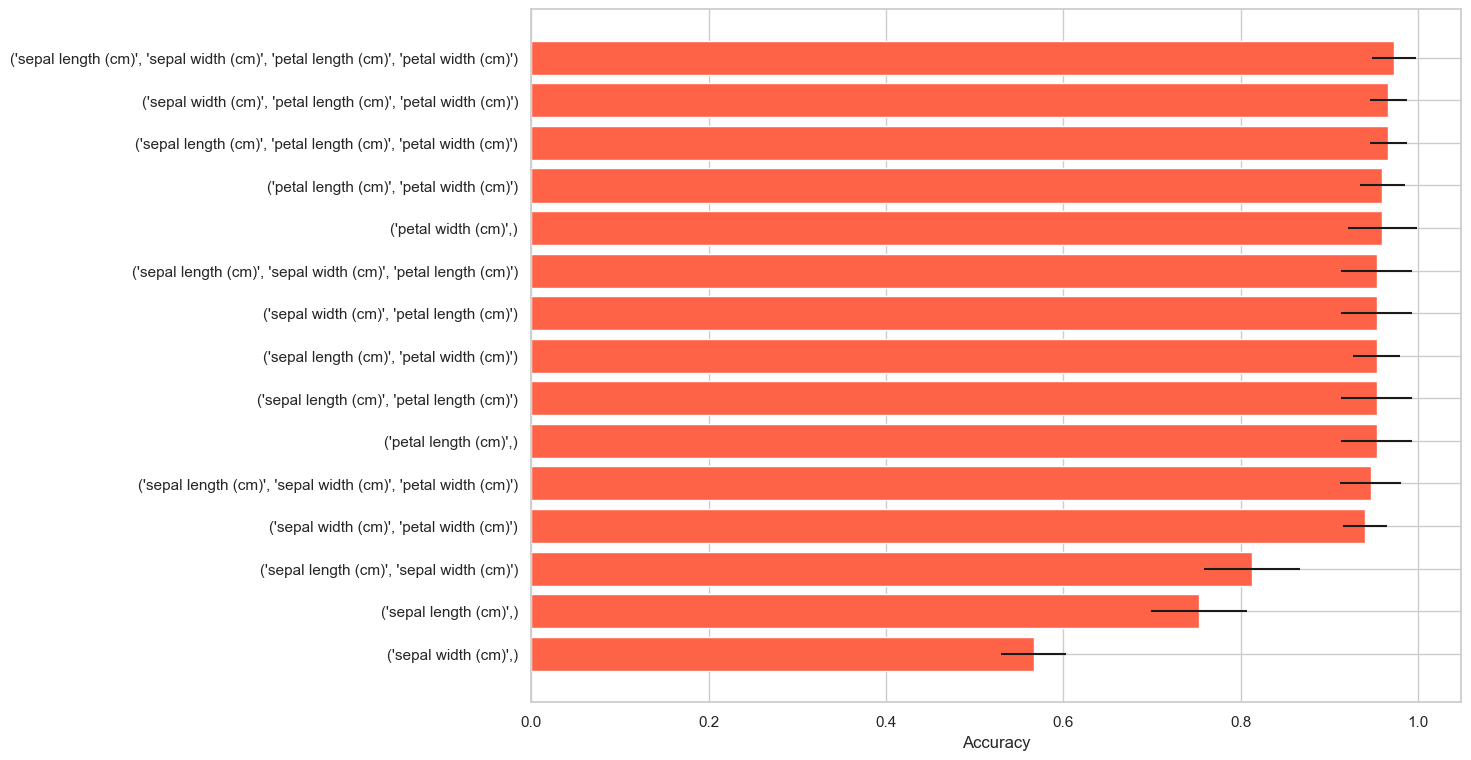

In [18]:
fig, ax = plt.subplots(figsize=(12,9))
y_pos=np.arange(len(efs_results))
ax.barh(y_pos,
       efs_results['avg_score'],
       xerr=efs_results['std_dev'],
       color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lr = LogisticRegression()
sfs = SFS(estimator=lr, k_features=(1,4), forward=True, scoring='accuracy', cv=5)
sfs = sfs.fit(X_data, y_data)

print('Best accuracy score: %.2f'% sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

Best accuracy score: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [26]:
X_data_new = sfs.transform(X_data)

print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 4


In [27]:
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le..."


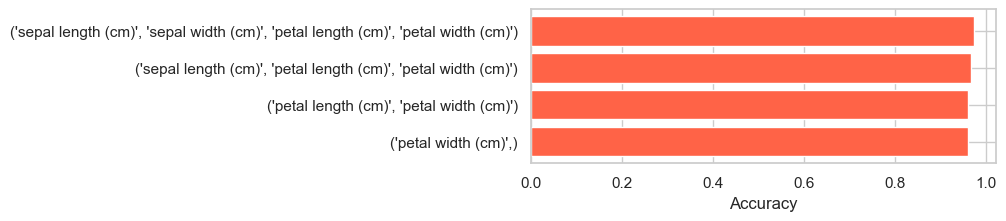

In [28]:
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))

ax.barh(y_pos, sfs_results['avg_score'], color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [29]:
lr = LogisticRegression()
sbs = SFS(estimator=lr, k_features=(1,4), forward=False, scoring='accuracy', cv=5)
sbs = sbs.fit(X_data, y_data)

print('Best accuracy score: %.2f'% sbs.k_score_)
print('Best subset (indices):', sbs.k_feature_idx_)
print('Best subset (corresponding names):', sbs.k_feature_names_)

Best accuracy score: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [30]:
X_data_new = sbs.transform(X_data)

print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 4


In [31]:
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

,feature_idx,cv_scores,avg_score,feature_names
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le..."
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"


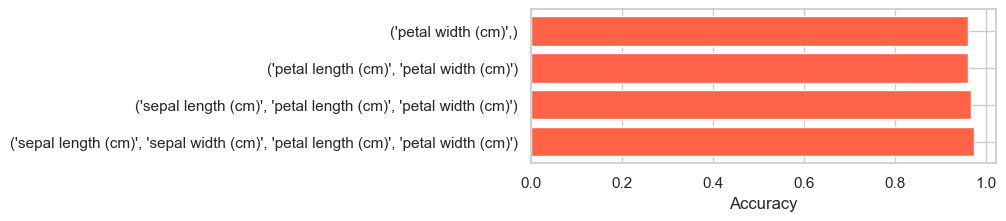

In [32]:
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sbs_results))

ax.barh(y_pos, sbs_results['avg_score'], color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [33]:
print('Best subset by EFS:', efs.best_feature_names_)
print('Best subset by SFS:', sfs.k_feature_names_)
print('Best subset by SBS:', sbs.k_feature_names_)

Best subset by EFS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SFS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SBS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

In [36]:
rfc = RandomForestClassifier(random_state=0, criterion='gini')
rfc.fit(X_train, y_train)

for feature in zip(feature_names, rfc.feature_importances_):
  print(feature)

('sepal length (cm)', 0.102443508848457)
('sepal width (cm)', 0.023647097298179886)
('petal length (cm)', 0.479778346415163)
('petal width (cm)', 0.39413104743820015)


In [37]:
from sklearn.feature_selection import SelectFromModel

rfc = RandomForestClassifier(random_state=0, criterion='gini')
sfm = SelectFromModel(estimator=rfc, threshold=0.2)
sfm = sfm.fit(X_train, y_train)

print('The most important features based on random forest classifier:')

for feature_list_index in sfm.get_support(indices=True):
  print('-' + feature_names[feature_list_index])

The most important features based on random forest classifier:
-petal length (cm)
-petal width (cm)


In [38]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

print('Number of features before transformation: {}'.format(X_train.shape[1]))
print('Number of features after transformation: {}'.format(X_important_train.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 2


In [39]:
from sklearn.metrics import accuracy_score

rfc_full = RandomForestClassifier(random_state=0, criterion='gini')
rfc_full.fit(X_train, y_train)
pred_full = rfc_full.predict(X_test)

print('The accuracy of classifier with full features {:.2f}'.format(accuracy_score(y_test, pred_full)))

The accuracy of classifier with full features 0.98


In [40]:
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')
rfc_lim.fit(X_important_train, y_train)
pred_lim = rfc_lim.predict(X_important_test)

print('The accuracy of classifier with limited features {:.2f}'.format(accuracy_score(y_test, pred_lim)))

The accuracy of classifier with limited features 0.98
